In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn import metrics

In [2]:
df = pd.read_csv('./data_old/Stori_Data_Challenge_2021.csv').drop(columns = ['Unnamed: 0'])
df

cust_id activated_date last_payment_date      balance  balance_frequency  \
0     C10001     2019-10-06        2020-09-09    40.900749           0.818182   
1     C10002     2019-10-06        2020-07-04  3202.467416           0.909091   
2     C10003     2019-10-06        2020-09-17  2495.148862           1.000000   
3     C10004     2019-10-06        2020-08-24  1666.670542           0.636364   
4     C10005     2019-10-06        2020-10-20   817.714335           1.000000   
...      ...            ...               ...          ...                ...   
8945  C19186     2020-07-31        2020-11-03    28.493517           1.000000   
8946  C19187     2020-07-31        2020-09-06    19.183215           1.000000   
8947  C19188     2020-07-31        2020-06-03    23.398673           0.833333   
8948  C19189     2020-07-31        2020-07-19    13.457564           0.833333   
8949  C19190     2020-07-31        2020-10-14   372.708075           0.666667   

      purchases  oneoff_purchases  installments_purchases  cash_advance  \
0         95.40              0.00                   95.40      0.000000   
1          0.00              0.00                    0.00   6442.945483   
2        773.17            773.17                    0.00      0.000000   
3       1499.00           1499.00                    0.00    205.788017   
4         16.00             16.00                    0.00      0.000000   
...         ...               ...                     ...           ...   
8945     291.12              0.00                  291.12      0.000000   
8946     300.00              0.00                  300.00      0.000000   
8947     144.40              0.00                  144.40      0.000000   
8948       0.00              0.00                    0.00     36.558778   
8949    1093.25           1093.25                    0.00    127.040008   

      purchases_frequency  ...  purchases_installments_frequency  \
0                0.166667  ...                          0.083333   
1                0.000000  ...                          0.000000   
2                1.000000  ...                          0.000000   
3                0.083333  ...                          0.000000   
4                0.083333  ...                          0.000000   
...                   ...  ...                               ...   
8945             1.000000  ...                          0.833333   
8946             1.000000  ...                          0.833333   
8947             0.833333  ...                          0.666667   
8948             0.000000  ...                          0.000000   
8949             0.666667  ...                          0.000000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         payments  minimum_payments  prc_full_payment  tenure  fraud  
0      201.802084        139.509787          0.000000      12      0  
1     4103.032597       1072.340217          0.222222      12      0  
2      622.066742        627.284787          0.000000      12      0  
3        0.000000               NaN          0.000000      12      0  
4      678

In [3]:
df = df.dropna()
# df.isna().sum()

In [4]:
df['activated_date'] = pd.to_datetime(df['activated_date'])
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'])
df['days_since_activated'] = df['last_payment_date'] - df['activated_date']
df['days_since_activated'] = df['days_since_activated'].dt.days.astype('int')
df

/var/folders/wy/gmfr1dfd72d5g9h5r030cm6m0000gn/T/ipykernel_31220/517529515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activated_date'] = pd.to_datetime(df['activated_date'])
/var/folders/wy/gmfr1dfd72d5g9h5r030cm6m0000gn/T/ipykernel_31220/517529515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_payment_date'] = pd.to_datetime(df['last_payment_date'])
/var/folders/wy/gmfr1dfd72d5g9h5r030cm6m0000gn/T/ipykernel_31220/517529515.py:3: SettingWithCopyWarning: 
A value is trying to be se

cust_id activated_date last_payment_date      balance  balance_frequency  \
0     C10001     2019-10-06        2020-09-09    40.900749           0.818182   
1     C10002     2019-10-06        2020-07-04  3202.467416           0.909091   
2     C10003     2019-10-06        2020-09-17  2495.148862           1.000000   
4     C10005     2019-10-06        2020-10-20   817.714335           1.000000   
5     C10006     2019-10-06        2020-07-27  1809.828751           1.000000   
...      ...            ...               ...          ...                ...   
8943  C19184     2020-07-31        2020-08-10     5.871712           0.500000   
8945  C19186     2020-07-31        2020-11-03    28.493517           1.000000   
8947  C19188     2020-07-31        2020-06-03    23.398673           0.833333   
8948  C19189     2020-07-31        2020-07-19    13.457564           0.833333   
8949  C19190     2020-07-31        2020-10-14   372.708075           0.666667   

      purchases  oneoff_purchases  installments_purchases  cash_advance  \
0         95.40              0.00                   95.40      0.000000   
1          0.00              0.00                    0.00   6442.945483   
2        773.17            773.17                    0.00      0.000000   
4         16.00             16.00                    0.00      0.000000   
5       1333.28              0.00                 1333.28      0.000000   
...         ...               ...                     ...           ...   
8943      20.90             20.90                    0.00      0.000000   
8945     291.12              0.00                  291.12      0.000000   
8947     144.40              0.00                  144.40      0.000000   
8948       0.00              0.00                    0.00     36.558778   
8949    1093.25           1093.25                    0.00    127.040008   

      purchases_frequency  ...  cash_advance_frequency  cash_advance_trx  \
0                0.166667  ...                0.000000                 0   
1                0.000000  ...                0.250000                 4   
2                1.000000  ...                0.000000                 0   
4                0.083333  ...                0.000000                 0   
5                0.666667  ...                0.000000                 0   
...                   ...  ...                     ...               ...   
8943             0.166667  ...                0.000000                 0   
8945             1.000000  ...                0.000000                 0   
8947             0.833333  ...                0.000000                 0   
8948             0.000000  ...                0.166667                 2   
8949             0.666667  ...                0.333333                 2   

      purchases_trx  credit_limit     payments  minimum_payments  \
0                 2        1000.0   201.802084        139.509787   
1                 0        7000.0  4103.032597       1072.340217   
2                12        7500.0   622.066742        627.284787   
4                 1        1200.0   678.334763        244.791237   
5                 8        1800.0  1400.057770       2407.246035   
...             ...           ...          ...               ...   
8943              1         500.0    58.644883         43.473717   
8945              6        1000.0   325.594462         48.886365   
8947              5        1000.0    81.270775         82.418369   
8948              0         500.0    52.549959         55.755628   
8949             23        1200.0    63.165404         88.288956   

      prc_full_payment  tenure  fraud  days_since_activated  
0             0.000000      12      0                   339  
1             0.222222      12      0                   272  
2             0.000000      12      0                   347  
4             0.000000      12      0                   380  
5             0.000000      12      0                   295  
...                ...     ..

In [5]:
df['fraud'].value_counts()

0    8429
1      68
Name: fraud, dtype: int64

In [337]:
68/8429

0.008067386404081148

In [6]:
print(f'Percentage of Fraud Transactions: {df["fraud"].value_counts()[1]/len(df)}')
print(f'Percentage of Normal Transactions: {df["fraud"].value_counts()[0]/len(df)}')

Percentage of Fraud Transactions: 0.0080028245263034
Percentage of Normal Transactions: 0.9919971754736966


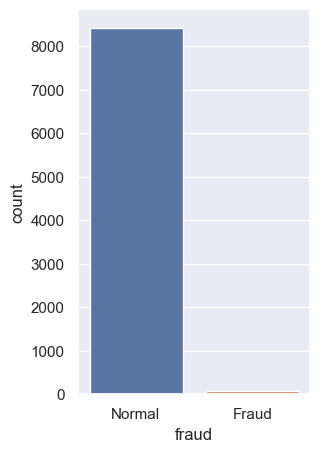

In [7]:
plt.figure(figsize=(3,5))
sns.countplot(x = 'fraud', data = df)
plt.xticks(np.arange(2), ['Normal', 'Fraud'])
plt.show()

In [8]:
df_fraud = df[df['fraud']==1]
df_normal = df[df['fraud']==0]

In [9]:
df_fraud.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count     68.000000          68.000000     68.000000         68.000000   
mean    6472.882404           0.970455  13718.579853       9725.706324   
std     4735.986209           0.107121  12109.322551      10770.595124   
min       24.463674           0.272727      0.000000          0.000000   
25%     2605.689131           1.000000   3807.942500        769.350000   
50%     5490.974356           1.000000  10210.490000       4329.100000   
75%     9415.946514           1.000000  22171.827500      16062.705000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count               68.000000     68.000000            68.000000   
mean              3992.873529   5830.547786             0.819942   
std               4730.905265   9520.993166             0.329446   
min                  0.000000      0.000000             0.000000   
25%                291.397500      0.000000             0.812500   
50%               2168.860000    888.859927             1.000000   
75%               5872.402500   7315.933885             1.000000   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                   68.000000                         68.000000   
mean                     0.613528                          0.690925   
std                      0.391534                          0.399197   
min                      0.000000                          0.000000   
25%                      0.250000                          0.416667   
50%                      0.750000                          0.916667   
75%                      1.000000                          1.000000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count               68.000000         68.000000      68.000000     68.000000   
mean                 0.302585         14.632353     101.352941  12845.588235   
std                  0.363452         23.751138      91.277298   6192.904795   
min                  0.000000          0.000000       0.000000   2500.000000   
25%                  0.000000          0.000000      28.500000   9000.000000   
50%                  0.083333          2.000000      87.500000  13000.000000   
75%                  0.666667         23.500000     139.250000  17125.000000   
max                  1.000000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment     tenure  fraud  \
count     68.000000         68.000000         68.000000  68.000000   68.0   
mean   17323.913366       3728.630186          0.244288  11.764706    1.0   
std    11749.848467       4665.962859          0.351955   0.979151    0.0   
min      206.073166        128.455136          0.000000   6.000000    1.0   
25%     8202.683300        699.907172          0.000000  12.000000    1.0   
50%    16505.430865       2034.621486          0.083333  12.000000    1.0   
75%    24853.288670       4635.016349          0.354166  12.000000    1.0   
max    50721.483360      21235.065300          1.000000  12.000000    1.0   

       days_since_activated  
count             68.000000  
mean             211.823529  
std               97.377392  
min              -11.000000  
25%              132.000000  
50%              236.500000  
75%              275.750000  
max              394.000000

In [10]:
df_normal.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8429.000000        8429.000000   8429.000000       8429.000000   
mean    1562.590963           0.894676    922.946045        531.461980   
std     2016.552979           0.207798   1507.699177       1133.586297   
min        0.000000           0.000000      0.000000          0.000000   
25%      145.320241           0.909091     41.200000          0.000000   
50%      904.395249           1.000000    368.470000         39.580000   
75%     2064.106212           1.000000   1114.260000        569.910000   
max    18495.558550           1.000000  14454.980000      14215.000000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8429.000000   8429.000000          8429.000000   
mean               391.802801    955.774409             0.493622   
std                747.242829   1909.472211             0.400952   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 92.280000      0.000000             0.500000   
75%                474.960000   1118.361104             0.916667   
max              12541.000000  26268.699890             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8429.000000                       8429.000000   
mean                     0.202428                          0.366469   
std                      0.297237                          0.397282   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8429.000000       8429.000000    8429.000000   8429.000000   
mean                 0.135930          3.220074      14.335152   4454.547174   
std                  0.199137          6.544350      22.635801   3549.042168   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     309.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure   fraud  \
count   8429.000000       8429.000000       8429.000000  8429.000000  8429.0   
mean    1657.633412        839.270156          0.158907    11.530905     0.0   
std     2345.514532       2327.175137          0.295841     1.315780     0.0   
min        0.049513          0.019163          0.000000     6.000000     0.0   
25%      415.618854        168.730445          0.000000    12.000000     0.0   
50%      888.272466        308.356999          0.000000    12.000000     0.0   
75%     1915.638655        807.206399          0.166667    12.000000     0.0   
max    40627.595240      76406.207520          1.000000    12.000000     0.0   

       days_since_activated  
count           8429.000000  
mean             149.381421  
std              104.949096  
min              -98.000000  
25%               71.000000  
50%              149.000000  
75%              228.000000  
max              395.000000

In [11]:
df = df[['balance','balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency','oneoff_purchases_frequency', 
       'purchases_installments_frequency', 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment','tenure', 'days_since_activated','fraud']]

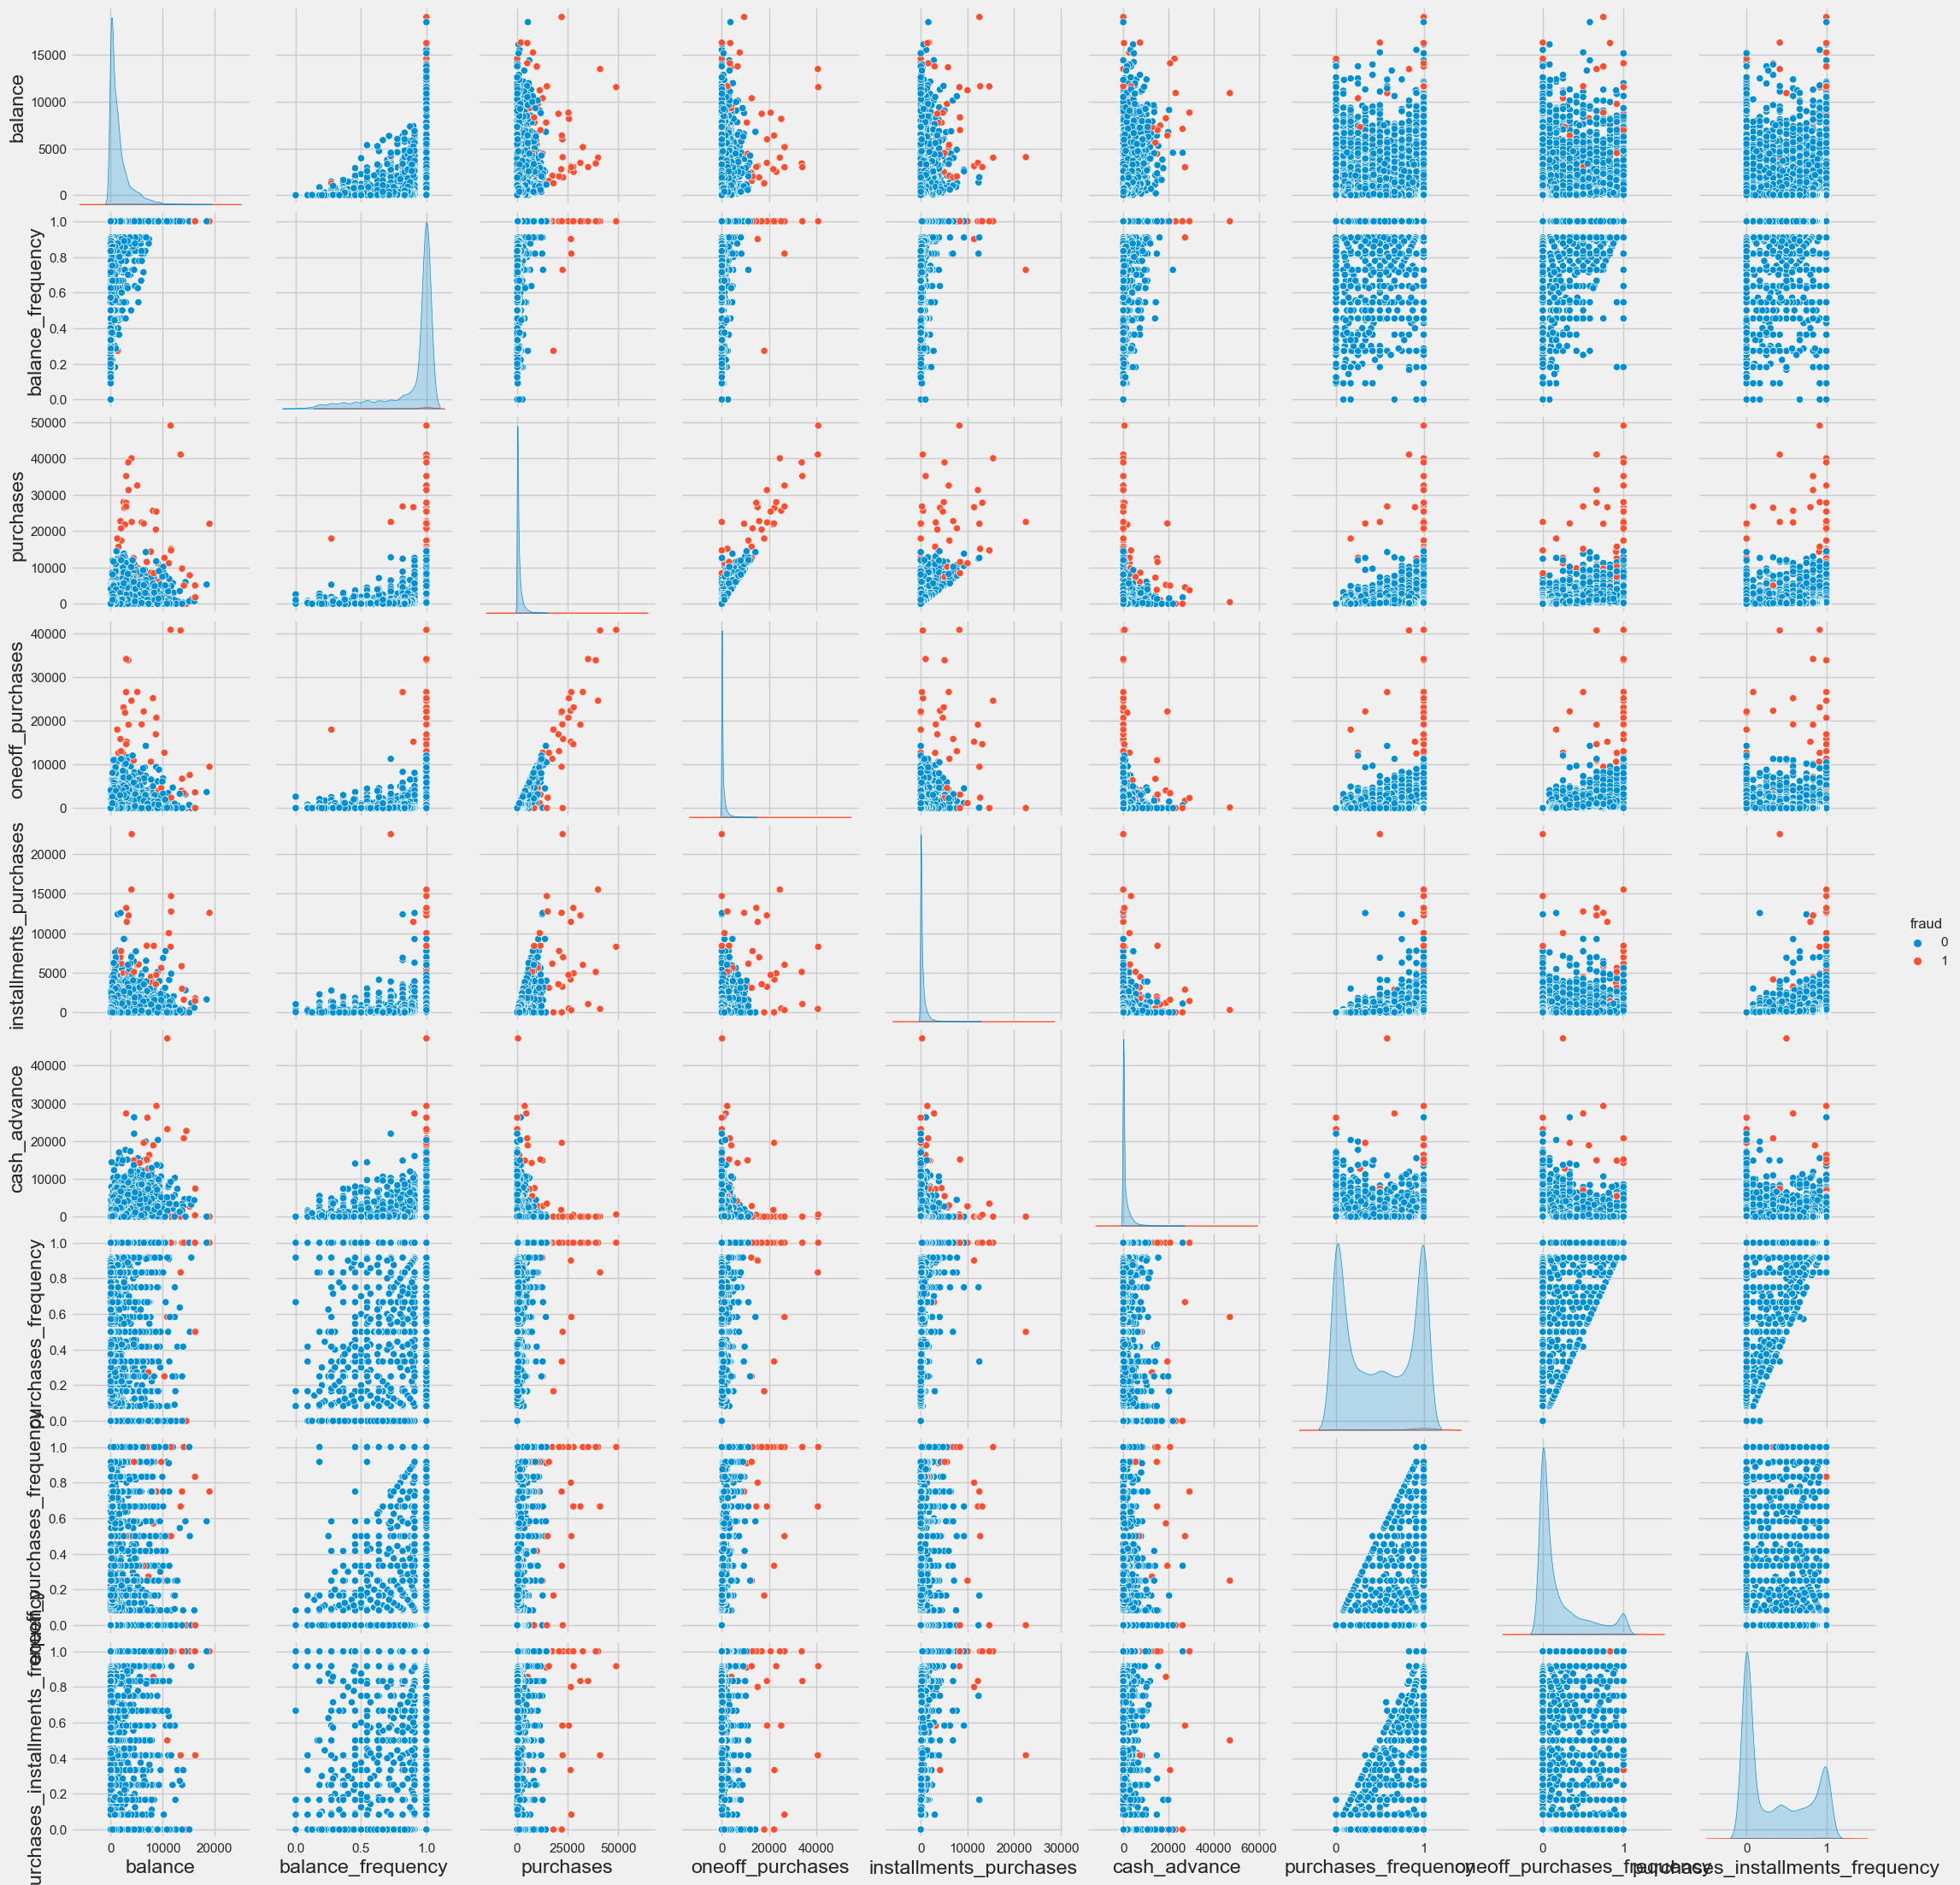

In [815]:
sns.pairplot(df, hue = 'fraud', vars = ['balance','balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency','oneoff_purchases_frequency', 
       'purchases_installments_frequency'] )

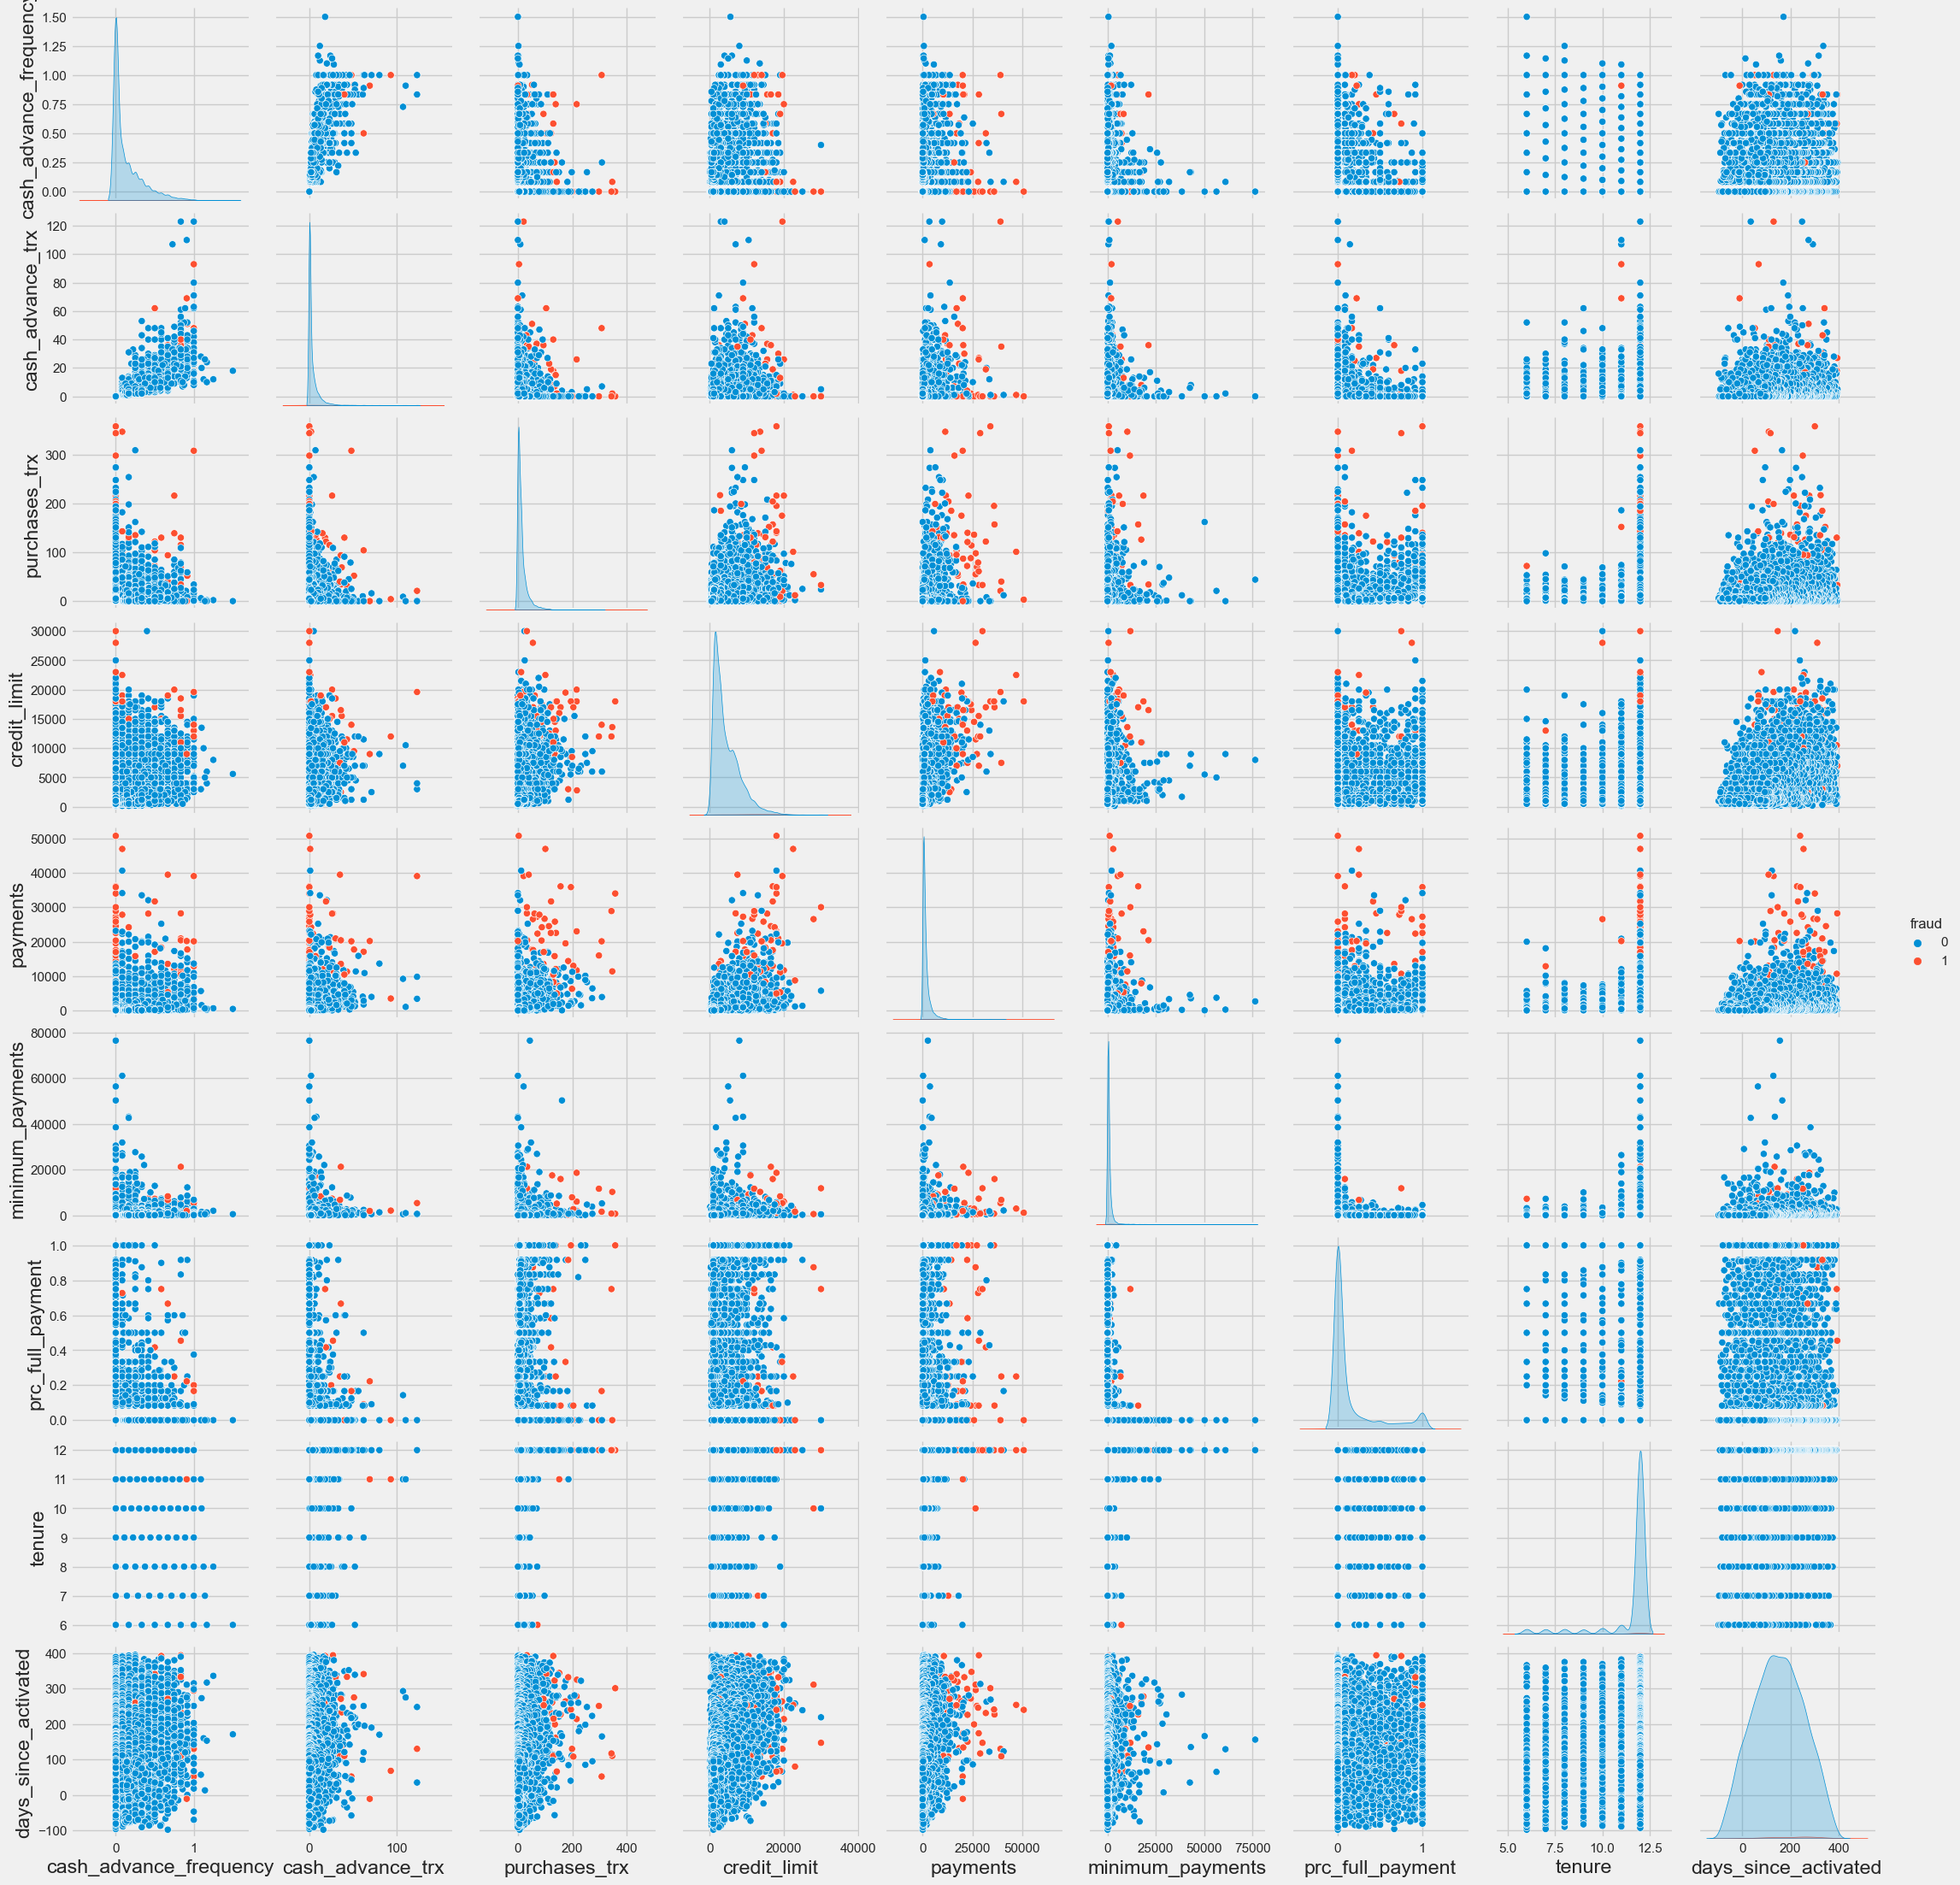

In [816]:
sns.pairplot(df, hue = 'fraud', vars = ['cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment','tenure', 'days_since_activated'] )

In [12]:
# Subset of data we need
X = df.iloc[:,:-1]
y = df['fraud']

## Train Test Split

In [13]:
scaler =  StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# X = df.iloc[:,:7]
# y = df['is_fraud']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## PCA

Comparing Normalization Scalers:

In [967]:
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.47475617 0.17857837 0.13987302]


In [923]:
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
df_pca['label'] = y.tolist()

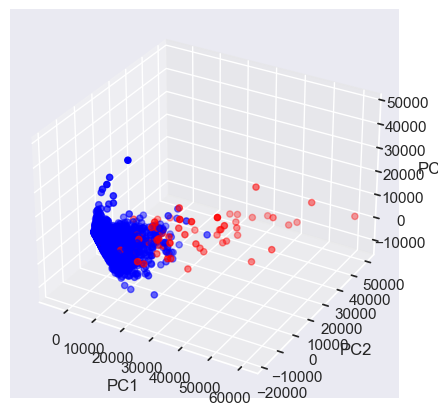

In [924]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
colors = {0:'blue', 1:'red'}
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['label'].map(colors), marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

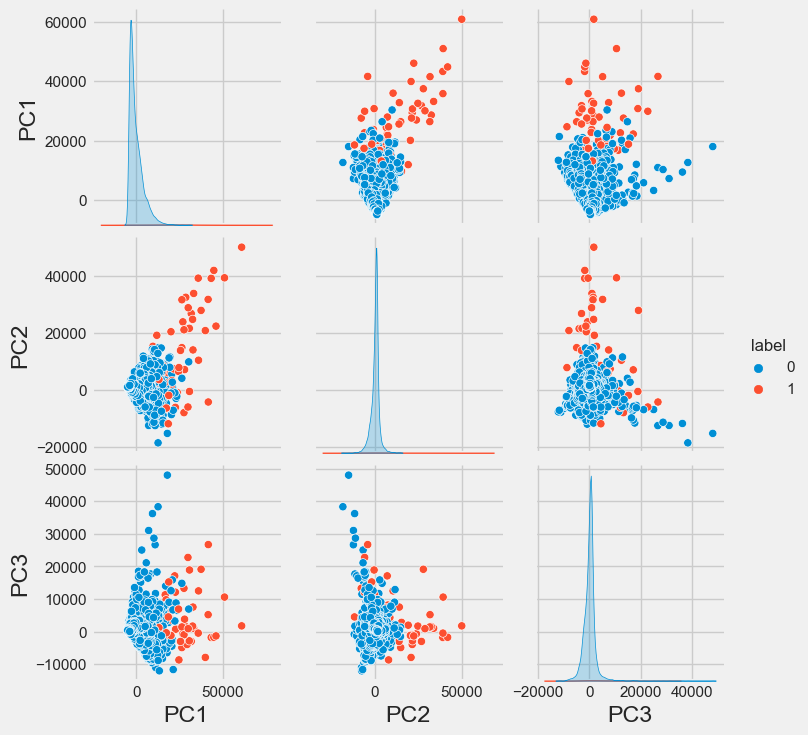

In [825]:
sns.pairplot(df_pca, hue = 'label', vars = ['PC1','PC2','PC3'] )

[0.47475617 0.17857837]


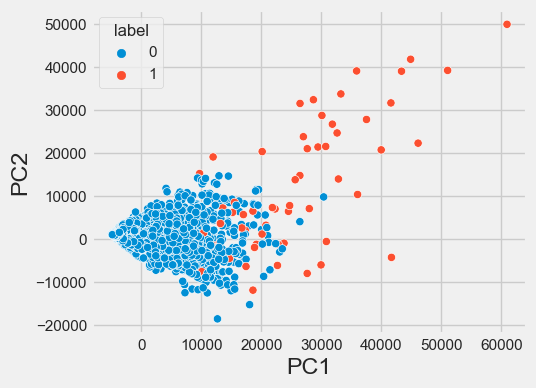

In [834]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['label'] = y.tolist()

plt.figure(figsize=(5,4))
sns.scatterplot(df_pca, x="PC1", y="PC2", hue="label")
plt.show()

In [615]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca_results = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.47114416 0.1370506  0.12466414 0.07517704 0.05742673 0.05236891
 0.0321312  0.01675734]


In [242]:
eval_df = pd.DataFrame(columns = ['Model','AUC Score','F1 Score (Fraud)','Precision (Fraud)','Recall (Fraud)','Average Precision'])

In [243]:
def evaluation(dataframe, model_name, y_test, preds, probas):
    new_row = {'Model': model_name,
               'AUC Score': roc_auc_score(y_test, probas, average='macro'), 
               'F1 Score (Fraud)': precision_recall_fscore_support(y_test, preds)[2][1], 
               'Precision (Fraud)': precision_recall_fscore_support(y_test, preds)[0][1],
               'Recall (Fraud)': precision_recall_fscore_support(y_test, preds)[1][1],
               'Average Precision': average_precision_score(y_test, preds)
              }
               
    dataframe = dataframe.append(new_row, ignore_index=True)
    
    return dataframe

## Unsupervised Learning

In [244]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc,roc_auc_score,average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Isolation Forest

In [245]:
IF = IsolationForest(n_estimators = 100, contamination = 0.01, random_state = 42)
IF.fit(X_train)
y_preds = IF.predict(X_test)

In [246]:
df_predictions = pd.DataFrame({'true_label':y_test,'IF_prediction':y_preds})
df_predictions['IF_prediction'] = df_predictions['IF_prediction'].map({1:0,-1:1})
df_predictions['IF_probas'] = -IF.score_samples(X_test)

In [247]:
print(classification_report(y_test, df_predictions['IF_prediction']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2778
           1       0.64      0.85      0.73        27

    accuracy                           0.99      2805
   macro avg       0.82      0.92      0.86      2805
weighted avg       1.00      0.99      0.99      2805



In [248]:
eval_df = evaluation(eval_df,'Isolation Forest',y_test, df_predictions['IF_prediction'],df_predictions['IF_probas'])
eval_df

Model  AUC Score  F1 Score (Fraud)  Precision (Fraud)  \
0  Isolation Forest   0.941378          0.730159           0.638889   

   Recall (Fraud)  Average Precision  
0        0.851852           0.545665

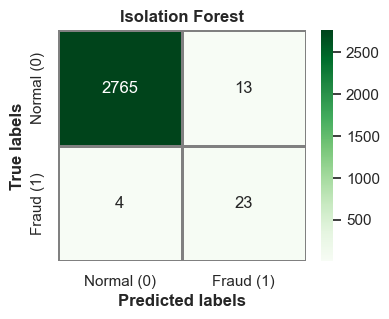

In [249]:
cm = metrics.confusion_matrix(y_test, df_predictions['IF_prediction'], labels=[0,1])
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Greens', linewidths=0.8, linecolor='gray', fmt='')
ax.set_xlabel('Predicted labels', fontweight="bold")
ax.set_ylabel('True labels', fontweight="bold") 
ax.set_title('Isolation Forest', fontweight="bold") 
ax.xaxis.set_ticklabels(['Normal (0)', 'Fraud (1)'])
ax.yaxis.set_ticklabels(['Normal (0)','Fraud (1)']);
plt.show()

### Gaussian Mixture

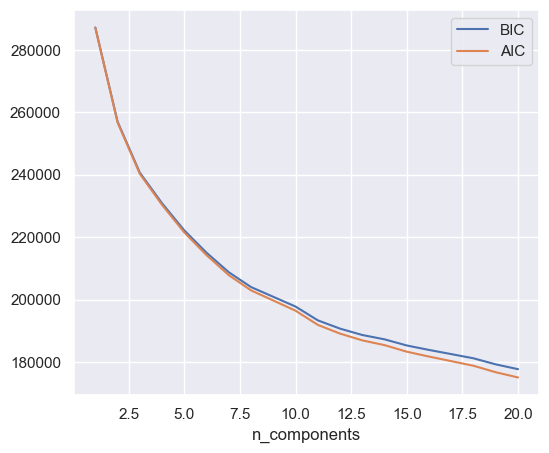

In [254]:
sns.set()
plt.figure(figsize=(6,5))
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n,n_init=10, covariance_type = 'spherical', random_state=42).fit(X_train)
          for n in n_components]

plt.plot(n_components, [m.bic(X_train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_train) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [255]:
gm = GaussianMixture(n_components = 10,n_init=10, covariance_type = 'spherical', random_state = 0)
gm.fit(X_train)

densities = -1*gm.score_samples(X_test)
density_threshold = np.percentile(densities,99)

In [256]:
densities

array([ 8.89788179, 13.43686626, 25.73339631, ...,  7.35925754,
       11.67308624, 24.38559768])

In [257]:
density_threshold

46.67412475342317

In [258]:
df_predictions['GMM_densiities'] = densities
df_predictions['GMM_prediction'] = 0
df_predictions.loc[df_predictions[densities > density_threshold].index,'GMM_prediction'] = 1

In [259]:
eval_df = evaluation(eval_df,'GMM',y_test, df_predictions['GMM_prediction'],df_predictions['GMM_densiities'])
eval_df
#% of transactions labeled as fraud that were correct (precision), Low precision indicates a high number of false positives.
#% of fraudulent transactions were caught succesfully (recall), Low recall indicates a high number of false negatives.

Model  AUC Score  F1 Score (Fraud)  Precision (Fraud)  \
0  Isolation Forest   0.941378          0.730159           0.638889   
1               GMM   0.947764          0.500000           0.482759   

   Recall (Fraud)  Average Precision  
0        0.851852           0.545665  
1        0.518519           0.254954

In [260]:
print(classification_report(y_test, df_predictions['GMM_prediction']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2778
           1       0.48      0.52      0.50        27

    accuracy                           0.99      2805
   macro avg       0.74      0.76      0.75      2805
weighted avg       0.99      0.99      0.99      2805



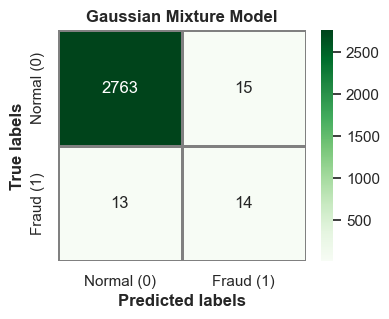

In [261]:
cm = metrics.confusion_matrix(y_test, df_predictions['GMM_prediction'], labels=[0,1])
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Greens', linewidths=0.8, linecolor='gray', fmt='')
ax.set_xlabel('Predicted labels', fontweight="bold")
ax.set_ylabel('True labels', fontweight="bold") 
ax.set_title('Gaussian Mixture Model', fontweight="bold") 
ax.xaxis.set_ticklabels(['Normal (0)', 'Fraud (1)'])
ax.yaxis.set_ticklabels(['Normal (0)','Fraud (1)']);
plt.show()

In [262]:
X_train[y_train == 0].shape

(5651, 18)

In [263]:
X_train[y_train == 1].shape

(41, 18)

### One-Class SVM (OCSVM)

In [264]:
from sklearn.svm import OneClassSVM

In [265]:
clf = OneClassSVM(gamma='auto').fit(X_train[y_train == 0])
df_predictions['OCSVM_densiities'] = -clf.score_samples(X_test)

In [266]:
density_threshold = np.percentile(df_predictions['OCSVM_densiities'] ,99)
df_predictions['OCSVM_prediction'] = 0
df_predictions.loc[df_predictions[df_predictions['OCSVM_densiities'] > density_threshold].index,'OCSVM_prediction'] = 1

In [267]:
eval_df = evaluation(eval_df,'OCSVM',y_test, df_predictions['OCSVM_prediction'],df_predictions['OCSVM_densiities'])
eval_df

Model  AUC Score  F1 Score (Fraud)  Precision (Fraud)  \
0  Isolation Forest   0.941378          0.730159           0.638889   
1               GMM   0.947764          0.500000           0.482759   
2             OCSVM   0.954217          0.607143           0.586207   

   Recall (Fraud)  Average Precision  
0        0.851852           0.545665  
1        0.518519           0.254954  
2        0.629630           0.372658

In [268]:
print(classification_report(y_test, df_predictions['OCSVM_prediction']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2778
           1       0.59      0.63      0.61        27

    accuracy                           0.99      2805
   macro avg       0.79      0.81      0.80      2805
weighted avg       0.99      0.99      0.99      2805



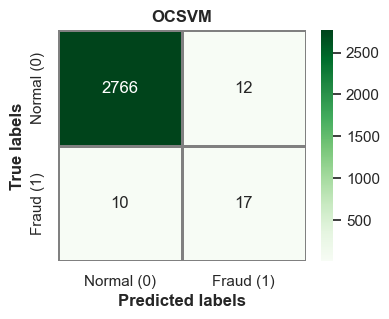

In [269]:
cm = metrics.confusion_matrix(y_test, df_predictions['OCSVM_prediction'], labels=[0,1])
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Greens', linewidths=0.8, linecolor='gray', fmt='')
ax.set_xlabel('Predicted labels', fontweight="bold")
ax.set_ylabel('True labels', fontweight="bold") 
ax.set_title('OCSVM', fontweight="bold") 
ax.xaxis.set_ticklabels(['Normal (0)', 'Fraud (1)'])
ax.yaxis.set_ticklabels(['Normal (0)','Fraud (1)']);
plt.show()

### Autoencoder

In [342]:
import torch
import random
import os
import time

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42)

In [343]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

In [344]:
class FraudDatasetUnsupervised(torch.utils.data.Dataset):
    
    def __init__(self, x,output=True):
        'Initialization'
        self.x = x
        self.output = output

    def __len__(self):
        'Returns the total number of samples'
        return len(self.x)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample index
        item = self.x[index].to('cpu')
        if self.output:
            return item, item
        else:
            return item

train_loader_params = {'batch_size': 512,'shuffle': True,'num_workers': 0}
test_loader_params = {'batch_size': 512,'num_workers': 0}
def prepare_generators(training_set,test_set,batch_size=64):
    
    training_generator = torch.utils.data.DataLoader(training_set, **train_loader_params)
    testing_generator = torch.utils.data.DataLoader(test_set, **test_loader_params)
    
    return training_generator,testing_generator

In [345]:
training_set = FraudDatasetUnsupervised(X_train_tensor)
test_set = FraudDatasetUnsupervised(X_test_tensor)

In [346]:
training_generator,test_generator = prepare_generators(training_set, test_set, batch_size = 512)

In [347]:
class SimpleAutoencoder(torch.nn.Module):
    
        def __init__(self, input_size, intermediate_size, code_size):
            super(SimpleAutoencoder, self).__init__()
            # parameters
            self.input_size = input_size
            self.intermediate_size = intermediate_size           
            self.code_size  = code_size
            
            self.tanh = torch.nn.Tanh()   
            
            #encoder
            self.fc1 = torch.nn.Linear(self.input_size, 16)
            self.fc2 = torch.nn.Linear(16, 8)
            self.fc3 = torch.nn.Linear(8, 4)
            
            #decoder 
            self.fc4 = torch.nn.Linear(4, 8) 
            self.fc5 = torch.nn.Linear(8, 16)            
            self.fc6 = torch.nn.Linear(16, self.input_size)
            
            
        def forward(self, x):
            
            hidden = self.fc1(x)
            hidden = self.tanh(hidden)
            
            hidden = self.fc2(hidden)
            hidden = self.tanh(hidden)
            
            code = self.fc3(hidden)
            code = self.tanh(code)
 
            hidden = self.fc4(code)
            hidden = self.tanh(hidden)
        
            hidden = self.fc5(hidden)
            hidden = self.tanh(hidden)
            
            output = self.fc6(hidden)
            #linear activation in final layer)            
            
            return output

In [348]:
criterion = torch.nn.MSELoss().to('cpu')

def per_sample_mse(model, generator):
    
    model.eval()
    criterion = torch.nn.MSELoss(reduction="none")
    batch_losses = []
    
    for x_batch, y_batch in generator:
        # Forward pass
        y_pred = model(x_batch)
        # Compute Loss
        loss = criterion(y_pred.squeeze(), y_batch)
        loss_app = list(torch.mean(loss,axis=1).detach().cpu().numpy())
        batch_losses.extend(loss_app)
    
    return batch_losses

In [349]:
# Untrained Autoencoder
# seed_everything(42)
# model = SimpleAutoencoder(X_train.shape[1], 100, 20).to('cpu')
# losses = per_sample_mse(model, valid_generator)

In [350]:
seed_everything(42)
training_generator,test_generator = prepare_generators(training_set, test_set, batch_size = 64)
criterion = torch.nn.MSELoss().to('cpu')
model = SimpleAutoencoder(X_train.shape[1], 16,8).to('cpu')
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001) #0.0001

In [351]:
class EarlyStopping:
    
    def __init__(self, patience=2, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = np.Inf
    
    def continue_training(self,current_score):
        if self.best_score > current_score:
            self.best_score = current_score
            self.counter = 0
            if self.verbose:
                print("New best score:", current_score)
        else:
            self.counter+=1
            if self.verbose:
                print(self.counter, " iterations since best score.")
                
        return self.counter <= self.patience    
    
def training_loop(model,training_generator,valid_generator,optimizer,criterion,max_epochs=100,apply_early_stopping=True,patience=2,verbose=False):
    #Setting the model in training mode
    model.train()

    if apply_early_stopping:
        early_stopping = EarlyStopping(verbose=verbose,patience=patience)
    
    all_train_losses = []
    all_valid_losses = []
    
    #Training loop
    start_time=time.time()
    for epoch in range(max_epochs):
        model.train()
        train_loss=[]
        for x_batch, y_batch in training_generator:
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            loss.backward()
            optimizer.step()   
            train_loss.append(loss.item())
        
        #showing last training loss after each epoch
        all_train_losses.append(np.mean(train_loss))
        if verbose:
            print('')
            print('Epoch {}: train loss: {}'.format(epoch, np.mean(train_loss)))
        #evaluating the model on the test set after each epoch    
        valid_loss = evaluate_model(model,valid_generator,criterion)
        all_valid_losses.append(valid_loss)
        if verbose:
            print('valid loss: {}'.format(valid_loss))
        if apply_early_stopping:
            if not early_stopping.continue_training(valid_loss):
                if verbose:
                    print("Early stopping")
                break
        
    training_execution_time=time.time()-start_time
    return model,training_execution_time,all_train_losses,all_valid_losses

def evaluate_model(model,generator,criterion):
    model.eval()
    batch_losses = []
    for x_batch, y_batch in generator:
        # Forward pass
        y_pred = model(x_batch)
        # Compute Loss
        loss = criterion(y_pred.squeeze(), y_batch)
        batch_losses.append(loss.item())
    mean_loss = np.mean(batch_losses)    
    return mean_loss

In [352]:
model,training_execution_time,train_losses,test_losses = training_loop(model, 
                                                                       training_generator,
                                                                       test_generator,
                                                                       optimizer,
                                                                       criterion,
                                                                       max_epochs=100,
                                                                       verbose=True)


Epoch 0: train loss: 0.9928982804218928
valid loss: 1.1517783204714458
New best score: 1.1517783204714458

Epoch 1: train loss: 1.0123648593823116
valid loss: 1.1486887137095134
New best score: 1.1486887137095134

Epoch 2: train loss: 1.0061943878730137
valid loss: 1.1457611719767253
New best score: 1.1457611719767253

Epoch 3: train loss: 1.0545800626277924
valid loss: 1.142949402332306
New best score: 1.142949402332306

Epoch 4: train loss: 1.01093224187692
valid loss: 1.1402551333109539
New best score: 1.1402551333109539

Epoch 5: train loss: 0.9910980612039566
valid loss: 1.137681782245636
New best score: 1.137681782245636

Epoch 6: train loss: 0.9866114407777786
valid loss: 1.1351915995279949
New best score: 1.1351915995279949

Epoch 7: train loss: 0.9994997928539912
valid loss: 1.1327956517537434
New best score: 1.1327956517537434

Epoch 8: train loss: 0.976223404208819
valid loss: 1.130462686220805
New best score: 1.130462686220805

Epoch 9: train loss: 0.9849876662095388
valid


Epoch 77: train loss: 0.6978035618861517
valid loss: 0.8362816969553629
New best score: 0.8362816969553629

Epoch 78: train loss: 0.6878969917694727
valid loss: 0.833392490943273
New best score: 0.833392490943273

Epoch 79: train loss: 0.7104423642158508
valid loss: 0.8306052188078562
New best score: 0.8306052188078562

Epoch 80: train loss: 0.7007939120133718
valid loss: 0.8278649350007375
New best score: 0.8278649350007375

Epoch 81: train loss: 0.6892109463612238
valid loss: 0.8251997927824656
New best score: 0.8251997927824656

Epoch 82: train loss: 0.7015854318936666
valid loss: 0.8226184149583181
New best score: 0.8226184149583181

Epoch 83: train loss: 0.7024805347124735
valid loss: 0.8201060891151428
New best score: 0.8201060891151428

Epoch 84: train loss: 0.6887056479851404
valid loss: 0.8176410098870596
New best score: 0.8176410098870596

Epoch 85: train loss: 0.6823572764794031
valid loss: 0.8152345418930054
New best score: 0.8152345418930054

Epoch 86: train loss: 0.66683

In [353]:
plt.plot(train_losses, linewidth=1.5)
plt.plot(test_losses, linewidth=1.5)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [354]:
test_losses = per_sample_mse(model, test_generator)
print(test_losses[0:5])
print(np.mean(test_losses))

[0.20585546, 0.45062092, 0.53361, 0.16655588, 0.2300522]
0.7604367


In [355]:
train_losses = per_sample_mse(model, training_generator)
print(train_losses[0:5])
print(np.mean(train_losses))

[0.217143, 0.31700006, 0.42942074, 0.23908149, 0.29372713]
0.6589101


In [356]:
# Calculating the anerage squared error for fradulent and normal transactions seperately
true_losses_test = np.array(test_losses)[y_test_tensor.cpu().numpy() == 0]
fraud_losses_test = np.array(test_losses)[y_test_tensor.cpu().numpy() == 1]
print("Average fraud reconstruction error:", np.mean(fraud_losses_test)) # Frauds were less well reconstructed
print("Average normal reconstruction error:", np.mean(true_losses_test))

Average fraud reconstruction error: 16.035204
Average normal reconstruction error: 0.6119778


In [385]:
plt.figure(figsize=(8,4))
plt.plot(np.random.choice(true_losses_test, 27), linewidth=1, marker = 'o',markersize = 3,linestyle = '-')#
plt.plot(fraud_losses_test, linewidth=1, marker = 'o',markersize = 3,linestyle = '-')
# plt.title('Reconstruction Error')
plt.ylabel('Reconstruction Error (MSE)')
plt.xlabel('Data Point Index')
plt.legend(['Noraml', 'Fraud'], loc='upper right')
plt.axhline(y =losses_threshold, color = 'r', linestyle = '--', linewidth = 1)
plt.show()

In [367]:
# Calculating the anerage squared error for fradulent and normal transactions seperately
true_losses_train = np.array(train_losses)[y_train_tensor.cpu().numpy() == 0]
fraud_losses_train = np.array(train_losses)[y_train_tensor.cpu().numpy() == 1]
print("Average fraud reconstruction error:", np.mean(fraud_losses_train)) # Frauds were less well reconstructed
print("Average normal reconstruction error:", np.mean(true_losses_train))

Average fraud reconstruction error: 0.8711312
Average normal reconstruction error: 0.6573704


In [358]:
true_losses = np.concatenate((true_losses_test, true_losses_train))
fraud_losses = np.concatenate((fraud_losses_test, fraud_losses_train))

In [359]:
losses = per_sample_mse(model, test_generator)

In [360]:
plt.plot(np.random.choice(true_losses, 68), linewidth=1, marker = 'o',markersize = 1,linestyle = '-')#
plt.plot(fraud_losses, linewidth=1, marker = 'o',markersize = 1,linestyle = '-')
# plt.title('Model Loss')
plt.ylabel('MSE')
plt.xlabel('Data Point Index')
plt.legend(['Noraml', 'Fraud'], loc='upper right')
plt.show()

In [361]:
losses_threshold = np.percentile(losses,99)
df_predictions['Autoencoder_losses'] = losses
df_predictions['Autoencoder_prediction'] = 0
df_predictions.loc[df_predictions[losses > losses_threshold].index,'Autoencoder_prediction'] = 1

In [362]:
print(classification_report(y_test, df_predictions['Autoencoder_prediction']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2778
           1       0.59      0.63      0.61        27

    accuracy                           0.99      2805
   macro avg       0.79      0.81      0.80      2805
weighted avg       0.99      0.99      0.99      2805



In [292]:
eval_df = evaluation(eval_df,'Autoencoder',y_test, df_predictions['Autoencoder_prediction'],df_predictions['Autoencoder_losses'])
eval_df

Model  AUC Score  F1 Score (Fraud)  Precision (Fraud)  \
0  Isolation Forest   0.941378          0.730159           0.638889   
1               GMM   0.947764          0.500000           0.482759   
2             OCSVM   0.954217          0.607143           0.586207   
3       Autoencoder   0.943485          0.607143           0.586207   

   Recall (Fraud)  Average Precision  
0        0.851852           0.545665  
1        0.518519           0.254954  
2        0.629630           0.372658  
3        0.629630           0.372658

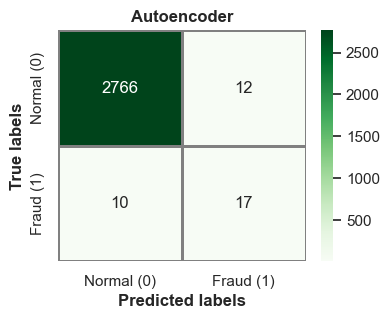

In [293]:
cm = metrics.confusion_matrix(y_test, df_predictions['Autoencoder_prediction'], labels=[0,1])
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Greens', linewidths=0.8, linecolor='gray', fmt='')
ax.set_xlabel('Predicted labels', fontweight="bold")
ax.set_ylabel('True labels', fontweight="bold") 
ax.set_title('Autoencoder', fontweight="bold") 
ax.xaxis.set_ticklabels(['Normal (0)', 'Fraud (1)'])
ax.yaxis.set_ticklabels(['Normal (0)','Fraud (1)']);
plt.show()

## Supervised Learning

In [294]:
clf = SVC()
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
y_probas = np.array(clf.decision_function(X_test)) 

In [295]:
eval_df = evaluation(eval_df,'SVM',y_test, y_preds,y_probas)
eval_df

Model  AUC Score  F1 Score (Fraud)  Precision (Fraud)  \
0  Isolation Forest   0.941378          0.730159           0.638889   
1               GMM   0.947764          0.500000           0.482759   
2             OCSVM   0.954217          0.607143           0.586207   
3       Autoencoder   0.943485          0.607143           0.586207   
4               SVM   0.969856          0.137931           1.000000   

   Recall (Fraud)  Average Precision  
0        0.851852           0.545665  
1        0.518519           0.254954  
2        0.629630           0.372658  
3        0.629630           0.372658  
4        0.074074           0.082987

In [296]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2778
           1       1.00      0.07      0.14        27

    accuracy                           0.99      2805
   macro avg       1.00      0.54      0.57      2805
weighted avg       0.99      0.99      0.99      2805



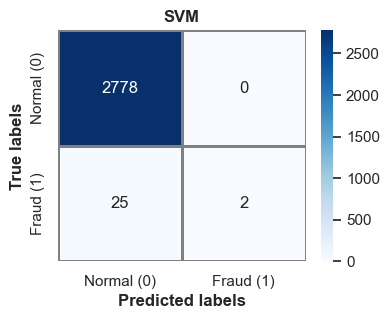

In [297]:
cm = metrics.confusion_matrix(y_test,y_preds, labels=[0,1])
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Blues', linewidths=0.8, linecolor='gray', fmt='')
ax.set_xlabel('Predicted labels', fontweight="bold")
ax.set_ylabel('True labels', fontweight="bold") 
ax.set_title('SVM', fontweight="bold") 
ax.xaxis.set_ticklabels(['Normal (0)', 'Fraud (1)'])
ax.yaxis.set_ticklabels(['Normal (0)','Fraud (1)']);
plt.show()

#### SVM with Oversampling (SMOTE)

In [298]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [299]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5651, 1: 5651})


In [300]:
clf = SVC()
clf.fit(X_res,y_res)
preds = clf.predict(X_test)
svm_smote_probas = np.array(clf.decision_function(X_test)) 

In [301]:
eval_df = evaluation(eval_df,'SVM (SMOTE)',y_test, preds, probas = svm_smote_probas)
eval_df

Model  AUC Score  F1 Score (Fraud)  Precision (Fraud)  \
0  Isolation Forest   0.941378          0.730159           0.638889   
1               GMM   0.947764          0.500000           0.482759   
2             OCSVM   0.954217          0.607143           0.586207   
3       Autoencoder   0.943485          0.607143           0.586207   
4               SVM   0.969856          0.137931           1.000000   
5       SVM (SMOTE)   0.898861          0.560000           0.608696   

   Recall (Fraud)  Average Precision  
0        0.851852           0.545665  
1        0.518519           0.254954  
2        0.629630           0.372658  
3        0.629630           0.372658  
4        0.074074           0.082987  
5        0.518519           0.320255

In [302]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2778
           1       0.61      0.52      0.56        27

    accuracy                           0.99      2805
   macro avg       0.80      0.76      0.78      2805
weighted avg       0.99      0.99      0.99      2805



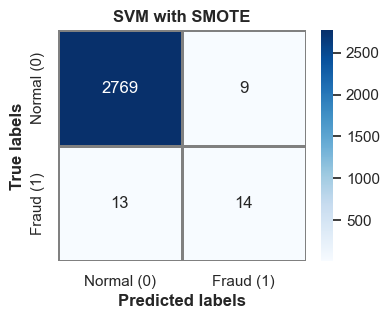

In [303]:
cm = metrics.confusion_matrix(y_test, preds, labels=[0,1])
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Blues', linewidths=0.8, linecolor='gray', fmt='')
ax.set_xlabel('Predicted labels', fontweight="bold")
ax.set_ylabel('True labels', fontweight="bold") 
ax.set_title('SVM with SMOTE', fontweight="bold") 
ax.xaxis.set_ticklabels(['Normal (0)', 'Fraud (1)'])
ax.yaxis.set_ticklabels(['Normal (0)','Fraud (1)']);
plt.show()

#### SVM with Balanced Bagging Classifier

In [304]:
from imblearn.ensemble import BalancedBaggingClassifier

In [305]:
svc = SVC()
bbc = BalancedBaggingClassifier(random_state=42, base_estimator=svc)
bbc.fit(X_train, y_train) 
y_pred = bbc.predict(X_test)
svm_bbc_probas = np.array(bbc.decision_function(X_test)) 

In [306]:
eval_df = evaluation(eval_df,'SVM (BBC)',y_test, y_pred, probas = svm_bbc_probas)
eval_df

Model  AUC Score  F1 Score (Fraud)  Precision (Fraud)  \
0  Isolation Forest   0.941378          0.730159           0.638889   
1               GMM   0.947764          0.500000           0.482759   
2             OCSVM   0.954217          0.607143           0.586207   
3       Autoencoder   0.943485          0.607143           0.586207   
4               SVM   0.969856          0.137931           1.000000   
5       SVM (SMOTE)   0.898861          0.560000           0.608696   
6         SVM (BBC)   0.953777          0.431034           0.280899   

   Recall (Fraud)  Average Precision  
0        0.851852           0.545665  
1        0.518519           0.254954  
2        0.629630           0.372658  
3        0.629630           0.372658  
4        0.074074           0.082987  
5        0.518519           0.320255  
6        0.925926           0.260805

In [307]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2778
           1       0.28      0.93      0.43        27

    accuracy                           0.98      2805
   macro avg       0.64      0.95      0.71      2805
weighted avg       0.99      0.98      0.98      2805



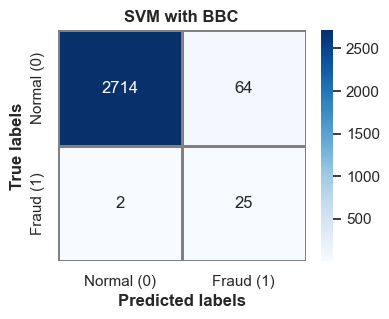

In [308]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Blues', linewidths=0.8, linecolor='gray', fmt='')
ax.set_xlabel('Predicted labels', fontweight="bold")
ax.set_ylabel('True labels', fontweight="bold") 
ax.set_title('SVM with BBC', fontweight="bold") 
ax.xaxis.set_ticklabels(['Normal (0)', 'Fraud (1)'])
ax.yaxis.set_ticklabels(['Normal (0)','Fraud (1)']);
plt.show()

### Feed-Forward Neural Network

In [309]:
class FraudDataset(torch.utils.data.Dataset):
    
    def __init__(self, x, y):
        'Initialization'
        self.x = x
        self.y = y

    def __len__(self):
        'Returns the total number of samples'
        return len(self.x)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample index
        if self.y is not None:
            return self.x[index].to('cpu'), self.y[index].to('cpu')
        else:
            return self.x[index].to('cpu')

In [310]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

In [311]:
train_loader_params = {'batch_size': 64,'shuffle': True,'num_workers': 0}
test_loader_params = {'batch_size': 64,'num_workers': 0}

# Generators
training_set = FraudDataset(X_train_tensor, y_train_tensor)
testing_set = FraudDataset(X_test_tensor, y_test_tensor)

training_generator = torch.utils.data.DataLoader(training_set, **train_loader_params)
testing_generator = torch.utils.data.DataLoader(testing_set, **test_loader_params)

In [312]:
class SimpleFraudMLP(torch.nn.Module):
    
    def __init__(self, input_size, hidden_size):
        super(SimpleFraudMLP, self).__init__()
        # parameters
        self.input_size = input_size
        self.hidden_size  = hidden_size

        #input to hidden
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        #hidden to output
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):

        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.sigmoid(output)

        return output

In [313]:
seed_everything(42)
model = SimpleFraudMLP(X_train.shape[1], 1000).to('cpu')
# criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([5]))
criterion = torch.nn.BCELoss().to('cpu')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.07)
# optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)

In [314]:
def evaluate_model(model,generator,criterion):
    model.eval()
    batch_losses = []
    for x_batch, y_batch in generator:
        # Forward pass
        y_pred = model(x_batch)
        # Compute Loss
        loss = criterion(y_pred.squeeze(), y_batch)
        batch_losses.append(loss.item())
    mean_loss = np.mean(batch_losses)    
    return mean_loss

In [315]:
def training_loop(model,training_generator,testing_generator,optimizer,criterion,max_epochs=100,apply_early_stopping=True,patience=2,verbose=False):
    #Setting the model in training mode
    model.train()

    if apply_early_stopping:
        early_stopping = EarlyStopping(verbose=verbose,patience=patience)
    
    all_train_losses = []
    all_valid_losses = []
    
    #Training loop
    start_time=time.time()
    for epoch in range(max_epochs):
        model.train()
        train_loss=[]
        for x_batch, y_batch in training_generator:
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            loss.backward()
            optimizer.step()   
            train_loss.append(loss.item())
        
        #showing last training loss after each epoch
        all_train_losses.append(np.mean(train_loss))
        if verbose:
            print('')
            print('Epoch {}: train loss: {}'.format(epoch, np.mean(train_loss)))
        #evaluating the model on the test set after each epoch    
        valid_loss = evaluate_model(model,testing_generator,criterion)
        all_valid_losses.append(valid_loss)
        if verbose:
            print('valid loss: {}'.format(valid_loss))
        if apply_early_stopping:
            if not early_stopping.continue_training(valid_loss):
                if verbose:
                    print("Early stopping")
                break
        
    training_execution_time=time.time()-start_time
    return model,training_execution_time,all_train_losses,all_valid_losses
model,training_execution_time,train_losses,valid_losses = training_loop(model,training_generator,testing_generator,optimizer,criterion,max_epochs=500,verbose=True)


Epoch 0: train loss: 0.06587902173985925
valid loss: 0.038354295644570484
New best score: 0.038354295644570484

Epoch 1: train loss: 0.025186138803118402
valid loss: 0.03309068805538118
New best score: 0.03309068805538118

Epoch 2: train loss: 0.021040752972214576
valid loss: 0.02975849879228256
New best score: 0.02975849879228256

Epoch 3: train loss: 0.019196520669364864
valid loss: 0.031595535459928215
1  iterations since best score.

Epoch 4: train loss: 0.018195285618807493
valid loss: 0.026867386996111072
New best score: 0.026867386996111072

Epoch 5: train loss: 0.017051339118082202
valid loss: 0.02725492396381345
1  iterations since best score.

Epoch 6: train loss: 0.016212587816420983
valid loss: 0.025862082587660883
New best score: 0.025862082587660883

Epoch 7: train loss: 0.015681238759968304
valid loss: 0.027942666140998797
1  iterations since best score.

Epoch 8: train loss: 0.01536664421921282
valid loss: 0.028803742003881118
2  iterations since best score.

Epoch 9: 

In [316]:
ma_window = 10

plt.plot(np.arange(len(epochs_train_losses)-ma_window + 1)+1, np.convolve(epochs_train_losses, np.ones(ma_window)/ma_window, mode='valid'))
plt.plot(np.arange(len(epochs_test_losses)-ma_window + 1)+1, np.convolve(epochs_test_losses, np.ones(ma_window)/ma_window, mode='valid'))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])

NameError: name 'epochs_train_losses' is not defined

In [317]:
model.eval()
df_predictions['NN_probas'] = model(X_test_tensor.to('cpu')).detach().numpy()
df_predictions['NN_prediction'] = 0
df_predictions.loc[df_predictions[df_predictions['NN_probas'] > 0.5].index,'NN_prediction'] = 1

In [318]:
eval_df = evaluation(eval_df,'Feed-Forward NN',y_test, df_predictions['NN_prediction'], probas = df_predictions['NN_probas'])
eval_df

Model  AUC Score  F1 Score (Fraud)  Precision (Fraud)  \
0  Isolation Forest   0.941378          0.730159           0.638889   
1               GMM   0.947764          0.500000           0.482759   
2             OCSVM   0.954217          0.607143           0.586207   
3       Autoencoder   0.943485          0.607143           0.586207   
4               SVM   0.969856          0.137931           1.000000   
5       SVM (SMOTE)   0.898861          0.560000           0.608696   
6         SVM (BBC)   0.953777          0.431034           0.280899   
7   Feed-Forward NN   0.911207          0.619048           0.866667   

   Recall (Fraud)  Average Precision  
0        0.851852           0.545665  
1        0.518519           0.254954  
2        0.629630           0.372658  
3        0.629630           0.372658  
4        0.074074           0.082987  
5        0.518519           0.320255  
6        0.925926           0.260805  
7        0.481481           0.422275

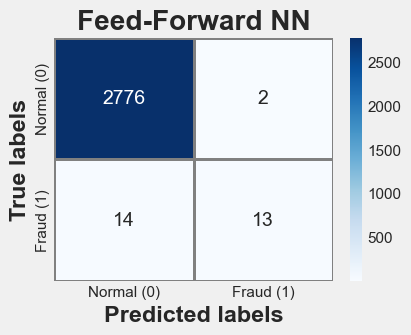

In [336]:
cm = metrics.confusion_matrix(y_test, df_predictions['NN_prediction'], labels=[0,1])
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Blues', linewidths=0.8, linecolor='gray', fmt='')
ax.set_xlabel('Predicted labels', fontweight="bold")
ax.set_ylabel('True labels', fontweight="bold") 
ax.set_title('Feed-Forward NN', fontweight="bold") 
ax.xaxis.set_ticklabels(['Normal (0)', 'Fraud (1)'])
ax.yaxis.set_ticklabels(['Normal (0)','Fraud (1)']);
plt.show()

In [320]:
X_train_tensor = torch.FloatTensor(X_res)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_res.values)
y_test_tensor = torch.FloatTensor(y_test.values)

In [321]:
train_loader_params = {'batch_size': 64,'shuffle': True,'num_workers': 0}
test_loader_params = {'batch_size': 64,'num_workers': 0}

# Generators
training_set = FraudDataset(X_train_tensor, y_train_tensor)
testing_set = FraudDataset(X_test_tensor, y_test_tensor)

training_generator = torch.utils.data.DataLoader(training_set, **train_loader_params)
testing_generator = torch.utils.data.DataLoader(testing_set, **test_loader_params)

In [322]:
seed_everything(42)
model = SimpleFraudMLP(X_train.shape[1], 1000).to('cpu')
criterion = torch.nn.BCELoss().to('cpu')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.07)
# optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)

In [239]:
model,training_execution_time,train_losses,valid_losses = training_loop(model,training_generator,testing_generator,optimizer,criterion,max_epochs=500,verbose=True)


Epoch 0: train loss: 0.19913449180496615
valid loss: 0.14495126259597865
New best score: 0.14495126259597865

Epoch 1: train loss: 0.13734708576973548
valid loss: 0.13653840649534355
New best score: 0.13653840649534355

Epoch 2: train loss: 0.10826821635756115
valid loss: 0.11823954145339402
New best score: 0.11823954145339402

Epoch 3: train loss: 0.08879322099820369
valid loss: 0.10089468532665209
New best score: 0.10089468532665209

Epoch 4: train loss: 0.07436946155450776
valid loss: 0.0948849210346287
New best score: 0.0948849210346287

Epoch 5: train loss: 0.06414095716456235
valid loss: 0.08708293668248436
New best score: 0.08708293668248436

Epoch 6: train loss: 0.05559106687831003
valid loss: 0.07916765795512633
New best score: 0.07916765795512633

Epoch 7: train loss: 0.049404806983630874
valid loss: 0.0895520785654133
1  iterations since best score.

Epoch 8: train loss: 0.044309477348112115
valid loss: 0.08008261628194967
2  iterations since best score.

Epoch 9: train los

In [240]:
df_predictions['NN_SMOTE_probas'] = model(X_test_tensor.to('cpu')).detach().numpy()
df_predictions['NN_SMOTE_prediction'] = 0
df_predictions.loc[df_predictions[df_predictions['NN_SMOTE_probas'] > 0.5].index,'NN_SMOTE_prediction'] = 1

In [241]:
eval_df = evaluation(eval_df,'Feed-Forward NN (SMOTE)',y_test, df_predictions['NN_SMOTE_prediction'], probas = df_predictions['NN_SMOTE_probas'])
eval_df

Model  AUC Score  F1 Score (Fraud)  Precision (Fraud)  \
0          Isolation Forest   0.941378          0.730159           0.638889   
1                       GMM   0.947764          0.500000           0.482759   
2                     OCSVM   0.954217          0.607143           0.586207   
3               Autoencoder   0.943485          0.607143           0.586207   
4                       SVM   0.969856          0.137931           1.000000   
5               SVM (SMOTE)   0.898861          0.560000           0.608696   
6                 SVM (BBC)   0.953777          0.431034           0.280899   
7           Feed-Forward NN   0.785417          0.067682           0.035461   
8   Feed-Forward NN (SMOTE)   0.839200          0.441558           0.340000   
9           Feed-Forward NN   0.785417          0.067682           0.035461   
10          Feed-Forward NN   0.785417          0.067682           0.035461   
11          Feed-Forward NN   0.481428          0.014893           0.007535   
12          Feed-Forward NN   0.043730          0.000000           0.000000   
13          Feed-Forward NN   0.911207          0.619048           0.866667   
14          Feed-Forward NN   0.911207          0.619048           0.866667   
15          Feed-Forward NN   0.911207          0.619048           0.866667   
16  Feed-Forward NN (SMOTE)   0.839200          0.441558           0.340000   

    Recall (Fraud)  Average Precision  
0         0.851852           0.545665  
1         0.518519           0.254954  
2         0.629630           0.372658  
3         0.629630           0.372658  
4         0.074074           0.082987  
5         0.518519           0.320255  
6         0.925926           0.260805  
7         0.740741           0.028763  
8         0.629630           0.217639  
9         0.740741           0.028763  
10        0.740741           0.028763  
11        0.629630           0.008310  
12        0.000000           0.009626  
13        0.481481           0.422275  
14        0.481481           0.422275  
15        0.481481           0.422275  
16        0.629630           0.217639

## Evaluation

In [323]:
plt.style.use('fivethirtyeight')

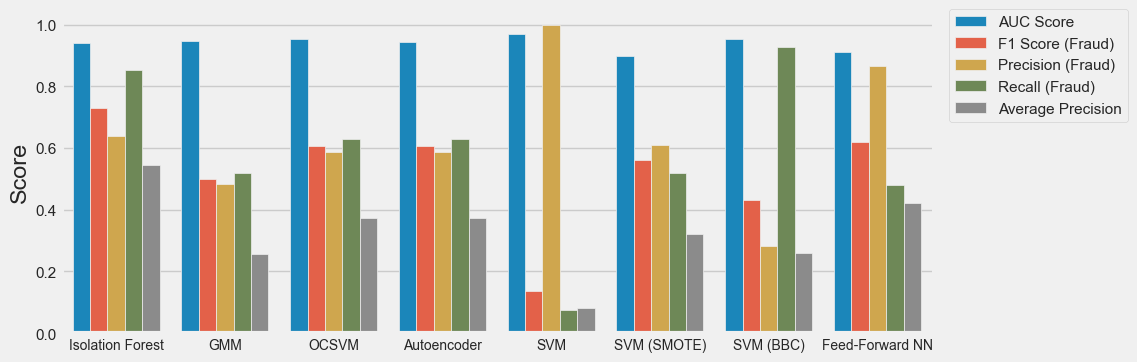

In [324]:
fig, ax1 = plt.subplots(figsize=(10,4))
tidy = eval_df.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=0, fontsize = 10, fontweight="medium")
plt.xlabel('')
plt.ylabel('Score')
sns.despine(fig)

In [325]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [326]:
fpr1, tpr1, thresholds = roc_curve(y_test, df_predictions['IF_probas'])
fpr2, tpr2, thresholds = roc_curve(y_test, densities)
fpr6, tpr6, thresholds = roc_curve(y_test, df_predictions['Autoencoder_losses'])
fpr3, tpr3, thresholds = roc_curve(y_test, y_probas)
fpr4, tpr4, thresholds = roc_curve(y_test, svm_smote_probas)
fpr5, tpr5, thresholds = roc_curve(y_test, svm_bbc_probas)
fpr7, tpr7, thresholds = roc_curve(y_test, df_predictions['NN_probas'])

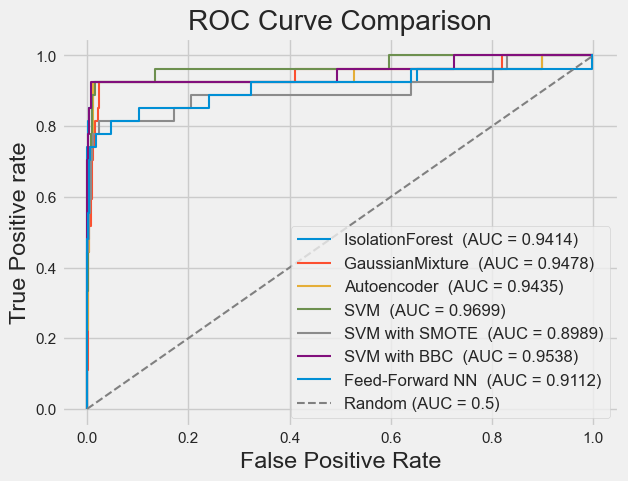

In [327]:

# plt.figure(figsize=(5,4))
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-', label='IsolationForest  (AUC = '+str(round(roc_auc_score(y_test, df_predictions['IF_probas']),4))+')',linewidth=1.5)
plt.plot(fpr2, tpr2, linestyle='-', label='GaussianMixture  (AUC = '+str(round(roc_auc_score(y_test, densities),4))+')',linewidth=1.5)
plt.plot(fpr6, tpr6, linestyle='-', label='Autoencoder  (AUC = '+str(round(roc_auc_score(y_test, df_predictions['Autoencoder_losses']),4))+')',linewidth=1.5)
plt.plot(fpr3, tpr3, linestyle='-', label='SVM  (AUC = '+str(round(roc_auc_score(y_test, y_probas),4))+')',linewidth=1.5)
plt.plot(fpr4, tpr4, linestyle='-', label='SVM with SMOTE  (AUC = '+str(round(roc_auc_score(y_test, svm_smote_probas),4))+')',linewidth=1.5)
plt.plot(fpr5, tpr5, linestyle='-', label='SVM with BBC  (AUC = '+str(round(roc_auc_score(y_test, svm_bbc_probas),4))+')',linewidth=1.5)
plt.plot(fpr7, tpr7, linestyle='-', label='Feed-Forward NN  (AUC = '+str(round(roc_auc_score(y_test, df_predictions['NN_probas']),4))+')',linewidth=1.5)

plt.plot([0, 1], [0, 1], linestyle='--', label='Random (AUC = 0.5)',linewidth=1.5, color='gray')
# title
plt.title('ROC Curve Comparison')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best', prop={'size': 12})
plt.savefig('ROC',dpi=300)
plt.show()

In [328]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import plot_precision_recall_curve

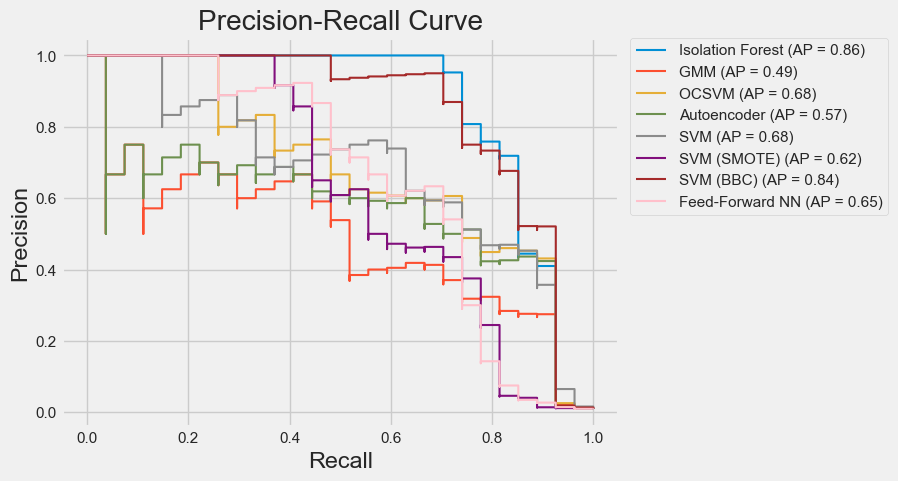

In [329]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, df_predictions['IF_probas'], ax=ax, name = 'Isolation Forest',linewidth=1.5)
PrecisionRecallDisplay.from_predictions(y_test, df_predictions['GMM_densiities'], ax=ax, name = 'GMM',linewidth=1.5)
PrecisionRecallDisplay.from_predictions(y_test, df_predictions['OCSVM_densiities'], ax=ax, name = 'OCSVM',linewidth=1.5)
PrecisionRecallDisplay.from_predictions(y_test, df_predictions['Autoencoder_losses'], ax=ax, name = 'Autoencoder',linewidth=1.5)
PrecisionRecallDisplay.from_predictions(y_test, y_probas, ax=ax, name = 'SVM',linewidth=1.5)
PrecisionRecallDisplay.from_predictions(y_test, svm_smote_probas, ax=ax, name = 'SVM (SMOTE)',linewidth=1.5)
PrecisionRecallDisplay.from_predictions(y_test, svm_bbc_probas, ax=ax, name = 'SVM (BBC)',linewidth=1.5, color = 'brown')
PrecisionRecallDisplay.from_predictions(y_test, df_predictions['NN_probas'], ax=ax, name = 'Feed-Forward NN',linewidth=1.5, color = 'pink')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Semi-Supervised Learning